<h1>Практика оптимизации. Прогнозирование биологического ответа.</h1>

<h2>Цель задания:</h2>

<p>Необходимо предсказать биологический ответ молекул (столбец 'Activity') по их химическому составу (столбцы D1-D1776).</p>
<p>Данные представлены в формате <em>CSV</em>.  Каждая строка представляет молекулу.</p> 
<ul>
  <li> Первый столбец <em>CActivity</em> содержит экспериментальные данные, описывающие фактический биологический ответ [0, 1]; </li>
  <li> Остальные столбцы D1-D1776 представляют собой молекулярные <strong>дескрипторы</strong> — это вычисляемые свойства, которые могут фиксировать некоторые характеристики молекулы, например размер, форму или состав элементов.</li>
</ul>

<p>Предварительная обработка не требуется, данные уже закодированы и нормализованы.</p>
<p>В качестве метрики будем использовать F1-score.</p>

<p>Необходимо обучить две модели: <strong>логистическую регрессию и случайный лес</strong>. Далее нужно сделать подбор гиперпараметров с помощью базовых и продвинутых методов оптимизации. Важно использовать <strong>все четыре метода</strong> (<em>GridSeachCV, RandomizedSearchCV, Hyperopt, Optuna</em>) хотя бы по разу, максимальное количество итераций не должно превышать 50.</p>

<h2>Выполнение задания:</h2>

<h3>Импорт библиотек:</h3>

In [111]:
import pandas as pd
import numpy as np

from sklearn import linear_model #линейные модели
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
import optuna

<h3>Получение данных и формирование наборов данных:</h3>

In [112]:
url = r"https://raw.githubusercontent.com/Andrey-Shatsev/DataScience/main/%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F/_train_sem09.csv"
df = pd.read_csv(url)

In [113]:
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [114]:
#Создаем матрицу наблюдений X и столбец с ответами y
X = df.drop('Activity', axis=1)
y = df['Activity']

In [115]:
#Создадим валидационные выборки данных:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Обучение моделей без оптимизации:</h3>

<h4>Логистическая регрессия:</h4>

In [116]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(random_state=42, max_iter=50)
#Обучаем модель, минизируя logloss
log_reg.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50, random_state=42)

In [117]:
#Делаем предсказание для каждой из выборок
y_train_lr_raw_pred = log_reg.predict(X_train)
y_valid_lr_raw_pred = log_reg.predict(X_valid)
#Выводим значения метрик
print('Train lr raw f1: {:.2f}'.format(metrics.f1_score(y_train, y_train_lr_raw_pred)))
print('Valid lr raw f1: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_lr_raw_pred))) 

Train lr raw f1: 0.88
Valid lr raw f1: 0.79


<h4>Случайный лес:</h4>

In [118]:
#Создаём объект класса RandomForestClassifier
rf_clf = ensemble.RandomForestClassifier(
    n_estimators=50, #число деревьев
    random_state=42 #генератор случайных чисел
)
#Обучаем модель
rf_clf.fit(X_train,y_train) 

RandomForestClassifier(n_estimators=50, random_state=42)

In [119]:
y_train_rf_raw_pred = rf_clf.predict(X_train)
y_valid_rf_raw_pred = rf_clf.predict(X_valid)

#Выводим значения метрик
print('Train rf raw f1: {:.2f}'.format(metrics.f1_score(y_train, y_train_rf_raw_pred)))
print('Valid rf raw f1: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_rf_raw_pred))) 

Train rf raw f1: 1.00
Valid rf raw f1: 0.82


<h3>Обучение моделей c оптимизацией:</h3>

<h4>Оптимизация методом GridSearch:</h4>

<h5>Логистическая регрессия:</h5>

In [120]:
# Создадим сетку параметров для логистической регрессии для оптимизации поиска по сетке:
param_grid = [
              {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, # уровень силы регуляризации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear', 'saga'],
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]

In [121]:
grid_seach_lr = GridSearchCV(estimator=linear_model.LogisticRegression(random_state=42, max_iter=50),
param_grid=param_grid, cv=5, n_jobs=-1)

In [122]:
# обучение:
grid_seach_lr.fit(X_train, y_train)

#предсказание
y_train_lr_grid_search_pred = grid_seach_lr.predict(X_train)
y_valid_lr_grid_search = grid_seach_lr.predict(X_valid)

#Выводим значения метрик
print('Train rf raw f1: {:.2f}'.format(metrics.f1_score(y_train, y_train_lr_grid_search_pred)))
print('Valid rf raw f1: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_lr_grid_search))) 

Train rf raw f1: 0.87
Valid rf raw f1: 0.78


<h5>Случайный лес:</h5>

In [123]:
param_grid = [
              {'criterion': ['gini', 'entropy'] , # критерий
              'min_samples_leaf': [1, 2,3,5,6,7,8,9,10,20,30]} # минимальное число листьев  
]

In [124]:
grid_seach_rf = GridSearchCV(estimator=ensemble.RandomForestClassifier(n_estimators=50,
    random_state=42),param_grid=param_grid, cv=5, n_jobs=-1)

In [125]:
# обучение:
grid_seach_rf.fit(X_train, y_train)

#предсказание
y_train_rf_grid_search_pred = grid_seach_rf.predict(X_train)
y_valid_rf_grid_search = grid_seach_rf.predict(X_valid)

#Выводим значения метрик
print('Train rf raw f1: {:.2f}'.format(metrics.f1_score(y_train, y_train_rf_grid_search_pred)))
print('Valid rf raw f1: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_rf_grid_search))) 

Train rf raw f1: 0.99
Valid rf raw f1: 0.83


In [126]:
print("Наилучшие значения параметров: {}".format(grid_seach_rf.best_params_))

Наилучшие значения параметров: {'criterion': 'entropy', 'min_samples_leaf': 2}


<h4>Оптимизация методом RandomizedSearch:</h4>

<h5>Логистическая регрессия:</h5>

In [127]:
c_list = np.arange(0.001,1,0.001, dtype=float)
c_list = np.around(c_list, decimals=3)
c_list = c_list.tolist() 

In [128]:
# Создадим сетку параметров для логистической регрессии для оптимизации поиска по сетке:
param_distributions = [
              {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
               'C': c_list}, # уровень силы регуляризации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear', 'saga'],
               'C': c_list}
]

In [129]:
randomized_seach_lr = RandomizedSearchCV(estimator=linear_model.LogisticRegression(random_state=42, max_iter=50),
param_distributions=param_distributions, cv=5, n_jobs=-1, n_iter=50)

In [130]:
# обучение:
randomized_seach_lr.fit(X_train, y_train)

#предсказание
y_train_lr_random_search_pred = randomized_seach_lr.predict(X_train)
y_valid_lr_random_search = randomized_seach_lr.predict(X_valid)

#Выводим значения метрик
print('Train rf raw f1: {:.2f}'.format(metrics.f1_score(y_train, y_train_lr_random_search_pred)))
print('Valid rf raw f1: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_lr_random_search))) 

Train rf raw f1: 0.86
Valid rf raw f1: 0.80


In [131]:
print("Наилучшие значения параметров: {}".format(randomized_seach_lr.best_params_))

Наилучшие значения параметров: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.603}


<h5>Случайный лес:</h5>

In [132]:
min_leaf_range = range(1,1000)
min_leaf_range = list(min_leaf_range)

In [133]:
param_distributions = [
              {'criterion': ['gini', 'entropy'] , # критерий
              'min_samples_leaf': min_leaf_range} # минимальное число листьев  
]

In [134]:
random_seach_rf = RandomizedSearchCV(estimator=ensemble.RandomForestClassifier(n_estimators=50,
    random_state=42),param_distributions=param_distributions, cv=5, n_jobs=-1, n_iter=50)

In [135]:
# обучение:
random_seach_rf.fit(X_train, y_train)

#предсказание
y_train_rf_random_search_pred = random_seach_rf.predict(X_train)
y_valid_rf_random_search = random_seach_rf.predict(X_valid)

#Выводим значения метрик
print('Train rf raw f1: {:.2f}'.format(metrics.f1_score(y_train, y_train_rf_random_search_pred)))
print('Valid rf raw f1: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_rf_random_search))) 

Train rf raw f1: 0.81
Valid rf raw f1: 0.79


In [136]:
print("Наилучшие значения параметров: {}".format(random_seach_rf.best_params_))

Наилучшие значения параметров: {'min_samples_leaf': 35, 'criterion': 'gini'}


<h4>Оптимизация методом HyperOpt:</h4>

In [137]:
# Проверим версию библиотеки hyperOpt:
print("Версия Hyperopt : {}".format(hyperopt.__version__))

Версия Hyperopt : 0.2.7


<h5>Логистическая регрессия:</h5>

In [138]:
# зададим пространство поиска гиперпараметров
space={'penalty': hp.choice('penalty',['l2', 'none']) , # тип регуляризации
              'solver': hp.choice('solver',['lbfgs', 'sag']), # алгоритм оптимизации
               'C': hp.uniform('C', 0.001, 1),
      }

In [139]:
# зафиксируем random_state
random_state = 42
def hyperopt_lr(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'penalty': str(params['penalty']), 
              'solver': str(params['solver']), 
             'C': float(params['C'])
              }
  
    # используем эту комбинацию для построения модели
    model = linear_model.LogisticRegression(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)
    score = metrics.f1_score(y, model.predict(X))
    
    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов
    # score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [140]:
# начинаем подбор гиперпараметров
trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_lr, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )
print("Наилучшие значения гиперпараметров {}".format(best))

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



  2%|▏         | 1/50 [00:01<01:00,  1.24s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



  4%|▍         | 2/50 [00:07<03:15,  4.08s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▌         | 3/50 [00:08<02:05,  2.67s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



  8%|▊         | 4/50 [00:14<03:03,  4.00s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 10%|█         | 5/50 [00:15<02:11,  2.93s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 12%|█▏        | 6/50 [00:21<02:54,  3.96s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 14%|█▍        | 7/50 [00:27<03:18,  4.61s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▌        | 8/50 [00:28<02:26,  3.48s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 18%|█▊        | 9/50 [00:29<01:51,  2.71s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 20%|██        | 10/50 [00:35<02:28,  3.71s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▏       | 11/50 [00:36<01:52,  2.88s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 24%|██▍       | 12/50 [00:42<02:24,  3.80s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 26%|██▌       | 13/50 [00:43<01:50,  2.99s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 28%|██▊       | 14/50 [00:49<02:18,  3.85s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|███       | 15/50 [00:55<02:36,  4.47s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 32%|███▏      | 16/50 [00:56<01:56,  3.43s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 34%|███▍      | 17/50 [01:01<02:17,  4.16s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 36%|███▌      | 18/50 [01:07<02:30,  4.69s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 38%|███▊      | 19/50 [01:15<02:49,  5.47s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 40%|████      | 20/50 [01:16<02:07,  4.26s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 42%|████▏     | 21/50 [01:17<01:37,  3.37s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 44%|████▍     | 22/50 [01:19<01:15,  2.71s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 46%|████▌     | 23/50 [01:20<01:04,  2.38s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 48%|████▊     | 24/50 [01:22<00:53,  2.06s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 50%|█████     | 25/50 [01:23<00:46,  1.86s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 52%|█████▏    | 26/50 [01:24<00:41,  1.72s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 54%|█████▍    | 27/50 [01:26<00:36,  1.58s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 56%|█████▌    | 28/50 [01:27<00:32,  1.49s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 58%|█████▊    | 29/50 [01:28<00:29,  1.41s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 60%|██████    | 30/50 [01:29<00:28,  1.41s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 62%|██████▏   | 31/50 [01:31<00:27,  1.43s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 64%|██████▍   | 32/50 [01:32<00:25,  1.39s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 66%|██████▌   | 33/50 [01:33<00:23,  1.36s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 68%|██████▊   | 34/50 [01:35<00:22,  1.42s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 70%|███████   | 35/50 [01:36<00:20,  1.39s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 72%|███████▏  | 36/50 [01:38<00:18,  1.34s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 74%|███████▍  | 37/50 [01:39<00:16,  1.26s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 76%|███████▌  | 38/50 [01:40<00:14,  1.21s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 78%|███████▊  | 39/50 [01:41<00:12,  1.18s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 80%|████████  | 40/50 [01:42<00:11,  1.19s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 82%|████████▏ | 41/50 [01:43<00:10,  1.20s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 84%|████████▍ | 42/50 [01:52<00:27,  3.47s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 86%|████████▌ | 43/50 [01:53<00:19,  2.82s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 88%|████████▊ | 44/50 [02:00<00:23,  3.96s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 90%|█████████ | 45/50 [02:01<00:15,  3.09s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 92%|█████████▏| 46/50 [02:02<00:09,  2.47s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 94%|█████████▍| 47/50 [02:08<00:10,  3.57s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 96%|█████████▌| 48/50 [02:09<00:05,  2.83s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



 98%|█████████▊| 49/50 [02:15<00:03,  3.77s/trial, best loss: -0.9073502161828289]

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 50/50 [02:16<00:00,  2.74s/trial, best loss: -0.9073502161828289]
Наилучшие значения гиперпараметров {'C': 0.6204988786789644, 'penalty': 1, 'solver': 0}


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



In [141]:
penalty_list = ['l2', 'none']
solver_list =['lbfgs', 'sag']

In [142]:
# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(
    random_state=random_state, 
    penalty=penalty_list[best['penalty']],
    solver=solver_list[best['solver']],
    C=float(best['C'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_valid)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_valid, y_test_pred)))

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


f1_score на обучающем наборе: 0.91
f1_score на тестовом наборе: 0.76


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h5>Случайный лес:</h5>

In [143]:
# зададим пространство поиска гиперпараметров
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 15, 26, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 2,30,1)
      }

In [144]:
# зафиксируем random_state
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)
    score = metrics.f1_score(y, model.predict(X))
    
    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов
    # score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score


In [145]:
# начинаем подбор гиперпараметров
trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )
print("Наилучшие значения гиперпараметров {}".format(best))


100%|██████████| 50/50 [01:53<00:00,  2.26s/trial, best loss: -0.9900373599003736]
Наилучшие значения гиперпараметров {'max_depth': 21.0, 'min_samples_leaf': 2.0, 'n_estimators': 120.0}


In [146]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(
    random_state=random_state, 
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_leaf=int(best['min_samples_leaf'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_valid)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_valid, y_test_pred)))


f1_score на обучающем наборе: 0.99
f1_score на тестовом наборе: 0.83


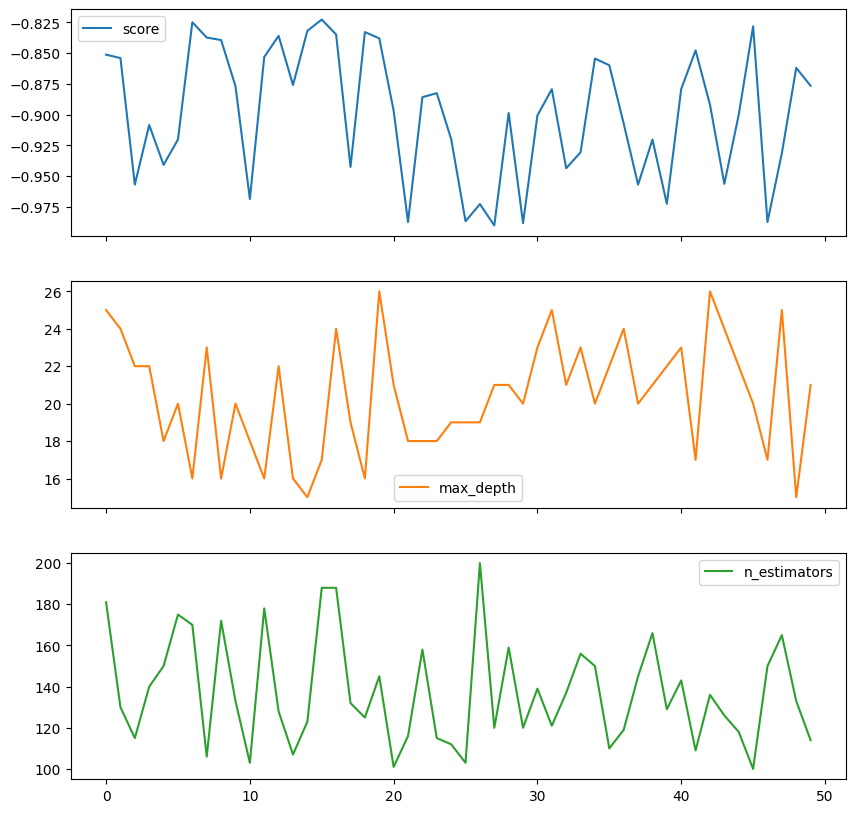

In [147]:
# отрисуем, как менялась точность при различных гиперпараметрах
tpe_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['max_depth'][0],
                      x['misc']['vals']['n_estimators'][0]] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=['score', 'max_depth', 'n_estimators'])
# тепловая карта в данном случае не очень наглядна, возьмем линейный график
tpe_results_df.plot(subplots=True,figsize=(10, 10));

<h4>Оптимизация методом Optuna:</h4>

<h5>Логистическая регрессия:</h5>

In [148]:
random_state = 42
def objective_lr(trial, cv=5, X=X_train, y=y_train, random_state=random_state): 

   params = {'penalty': trial.suggest_categorical('penalty',['l2', 'none']), 
              'solver': trial.suggest_categorical('solver',['lbfgs', 'sag']), 
             'C': trial.suggest_float('C',0.001, 1)
              }
   
   # используем эту комбинацию для построения модели
   model = linear_model.LogisticRegression(**params, random_state=random_state)

   # обучаем модель
   model.fit(X, y)
   score = metrics.f1_score(y, model.predict(X))
   return -score

In [149]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_lr, n_trials=50)

[I 2023-02-26 18:47:22,907] A new study created in memory with name: no-name-3f876028-3e6f-4dc1-ac2c-d59da14aa915
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2023-02-26 18:47:24,102] Trial 0 finished with value: -0.9073502161828289 and parameters: {'penalty': 'none', 'solver': 'lbfgs', 'C': 0

In [150]:
print("Best value: {} (params: {})\n".format(study.best_value, study.best_params))

Best value: -0.9073502161828289 (params: {'penalty': 'none', 'solver': 'lbfgs', 'C': 0.8270025279895504})



In [151]:
# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(
    random_state=random_state, 
    penalty=str(study.best_params['penalty']),
    solver=str(study.best_params['solver']),
    C=float(study.best_params['C'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_valid)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_valid, y_test_pred)))

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


f1_score на обучающем наборе: 0.91
f1_score на тестовом наборе: 0.76


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h5>Случайный лес:</h5>

In [152]:
random_state = 42
def objective_fr(trial, cv=5, X=X_train, y=y_train, random_state=random_state):
   params = {'n_estimators': trial.suggest_int('n_estimators',1,100), 
              'max_depth': trial.suggest_int('max_depth',1,200), 
             'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,100)
              }
   
   # используем эту комбинацию для построения модели
   model = ensemble.RandomForestClassifier(**params, random_state=random_state)

   # обучаем модель
   model.fit(X, y)
   score = metrics.f1_score(y, model.predict(X))
   return -score

In [153]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_fr, n_trials=50)

[I 2023-02-26 18:49:11,106] A new study created in memory with name: no-name-08940fdd-a7e2-4a0a-8be6-733373f2e6eb
[I 2023-02-26 18:49:11,756] Trial 0 finished with value: -0.7625585023400936 and parameters: {'n_estimators': 78, 'max_depth': 103, 'min_samples_leaf': 84}. Best is trial 0 with value: -0.7625585023400936.
[I 2023-02-26 18:49:12,011] Trial 1 finished with value: -0.8220897395669909 and parameters: {'n_estimators': 12, 'max_depth': 134, 'min_samples_leaf': 22}. Best is trial 1 with value: -0.8220897395669909.
[I 2023-02-26 18:49:12,488] Trial 2 finished with value: -0.7703889585947301 and parameters: {'n_estimators': 49, 'max_depth': 132, 'min_samples_leaf': 67}. Best is trial 1 with value: -0.8220897395669909.
[I 2023-02-26 18:49:13,025] Trial 3 finished with value: -0.7624102403996255 and parameters: {'n_estimators': 67, 'max_depth': 113, 'min_samples_leaf': 83}. Best is trial 1 with value: -0.8220897395669909.
[I 2023-02-26 18:49:13,567] Trial 4 finished with value: -0.86

In [154]:
print("Best value: {} (params: {})\n".format(study.best_value, study.best_params))

Best value: -1.0 (params: {'n_estimators': 90, 'max_depth': 177, 'min_samples_leaf': 1})



In [155]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(
    random_state=random_state, 
    n_estimators=int(study.best_params['n_estimators']),
    max_depth=int(study.best_params['max_depth']),
    min_samples_leaf=int(study.best_params['min_samples_leaf'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_valid)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_valid, y_test_pred)))

f1_score на обучающем наборе: 1.00
f1_score на тестовом наборе: 0.83
